In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [99]:
df_train=pd.read_csv("/content/SalaryData_Train.csv")

In [100]:
df_test=pd.read_csv("/content/SalaryData_Test.csv")

In [101]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **EDA on Train and Test Data**

In [102]:
df_train.shape

(30161, 14)

In [103]:
df_test.shape

(15060, 14)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [106]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [107]:
df_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [108]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [109]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [110]:
#categorical variables
category=[var for var in df_train.columns if df_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n',category)

There are 9 categorical variables

The categorical variables are as follows :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [111]:
#numerical variables

numerical=[var for var in df_train.columns if df_train[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are as follows :\n\n',numerical)

There are 5 numerical variables

The numerical variables are as follows :

 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [112]:
for var in category:
  print(df_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [113]:
for var in category:
  print(df_test[var].value_counts)

<bound method IndexOpsMixin.value_counts of 0              Private
1              Private
2            Local-gov
3              Private
4              Private
             ...      
15055          Private
15056          Private
15057          Private
15058          Private
15059     Self-emp-inc
Name: workclass, Length: 15060, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                 11th
1              HS-grad
2           Assoc-acdm
3         Some-college
4                 10th
             ...      
15055        Bachelors
15056        Bachelors
15057        Bachelors
15058        Bachelors
15059        Bachelors
Name: education, Length: 15060, dtype: object>
<bound method IndexOpsMixin.value_counts of 0              Never-married
1         Married-civ-spouse
2         Married-civ-spouse
3         Married-civ-spouse
4              Never-married
                ...         
15055          Never-married
15056               Divorced
15057     Married-civ-spouse
15058  

In [114]:
for var in category:
  print(var, 'has', len(df_train[var].unique()), 'labels')

workclass has 7 labels
education has 16 labels
maritalstatus has 7 labels
occupation has 14 labels
relationship has 6 labels
race has 5 labels
sex has 2 labels
native has 40 labels
Salary has 2 labels


In [115]:
df_train[df_train.duplicated()].shape

(3258, 14)

In [116]:
df_test[df_train.duplicated()].shape

(1002, 14)

In [117]:
Train=df_train.drop_duplicates()

In [118]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [119]:
Train.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [120]:
df_test[df_test.duplicated()].shape

(930, 14)

In [121]:
Test=df_test.drop_duplicates()

In [122]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# **Visualizing the data**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

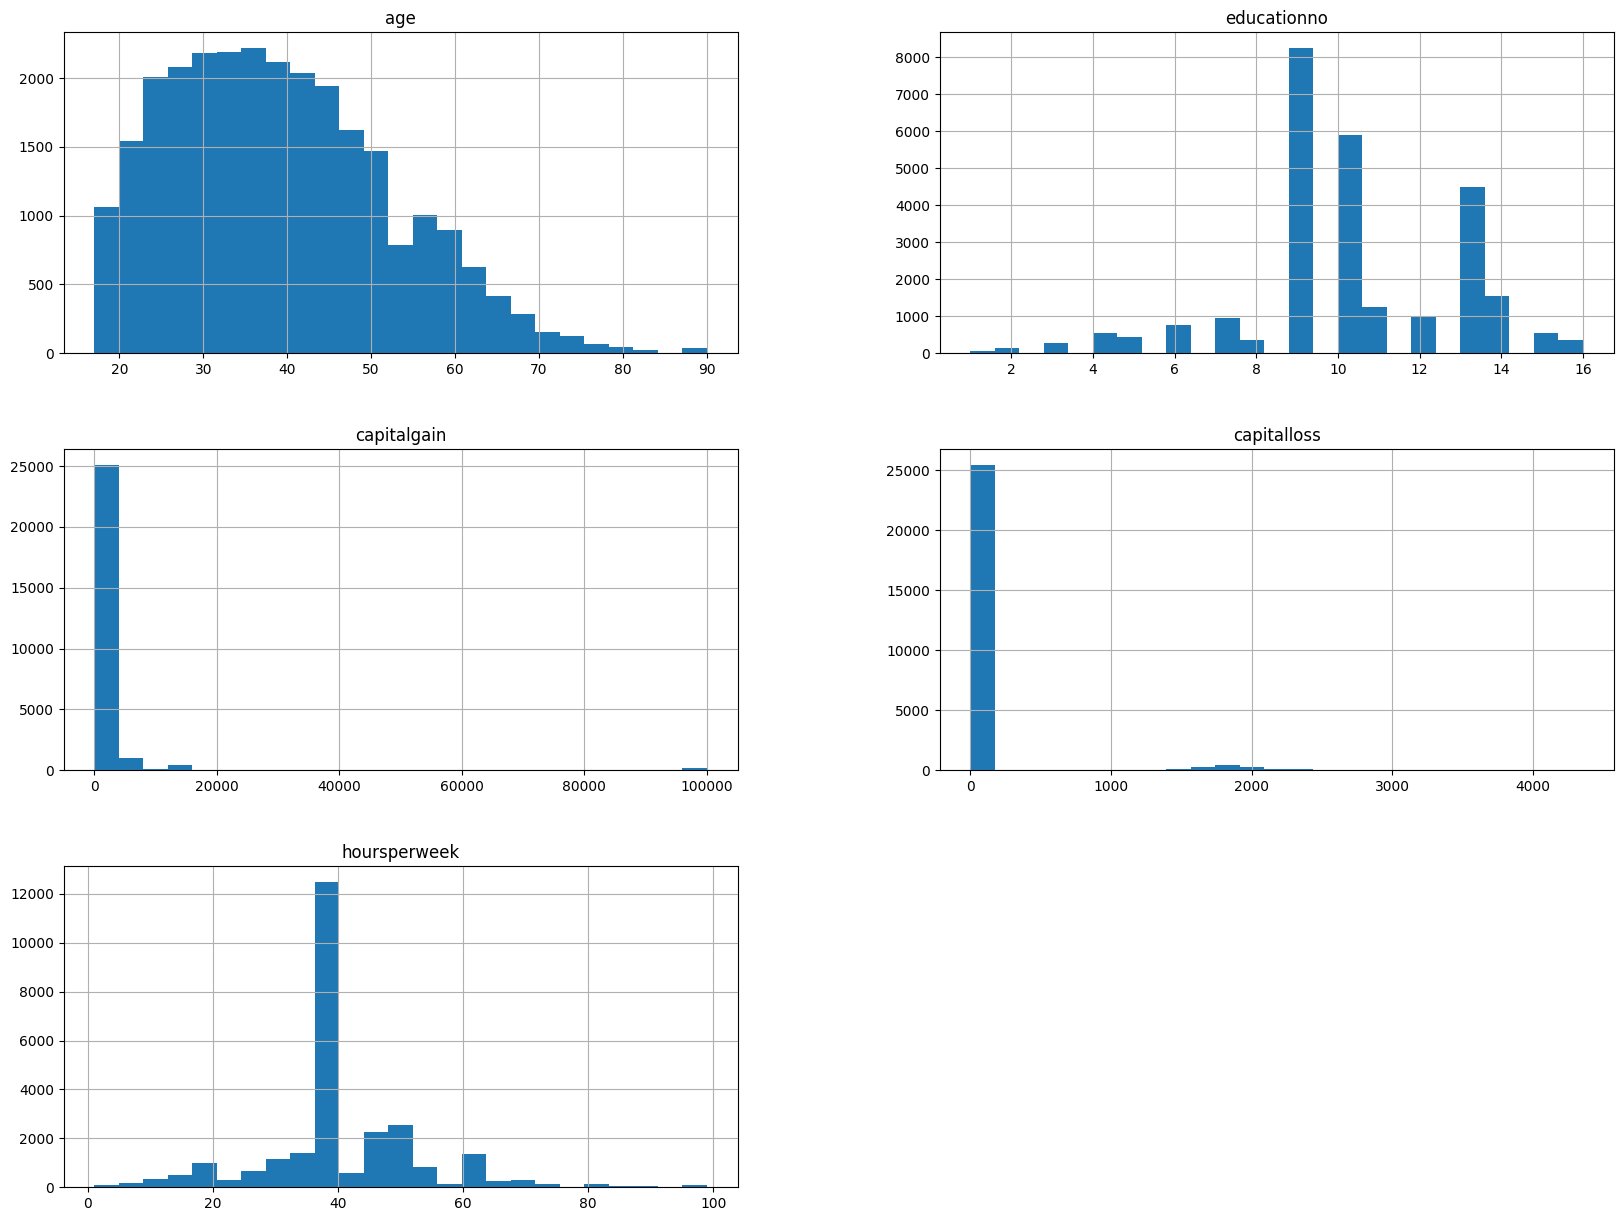

In [123]:
Train.hist(bins=25,figsize=(20,15))

In [124]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [125]:
category_columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native', 'Salary']
le=LabelEncoder()
for i in category_columns:
  Train[i]=le.fit_transform(Train[i])
  Test[i]=le.fit_transform(Test[i])

In [126]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,1
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,0
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0


In [127]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [128]:
sc=MinMaxScaler()
Train[['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native']]=sc.fit_transform(Train[['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native']])
Test[['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native']]=sc.fit_transform(Test[['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native']])

## Combine **Train** data and **Test** data

In [129]:

dfs = [Train,Test]
df = pd.concat(dfs)


In [130]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.309859,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.205128,0.0,0.419355,0.948718,0
1,0.464789,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.129032,0.948718,0
2,0.295775,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.000000,0.0,0.419355,0.948718,0
3,0.507042,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.000000,0.0,0.419355,0.948718,0
4,0.154930,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.000000,0.0,0.419355,0.102564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.222222,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.443182,0.948718,0
15056,0.305556,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.397727,0.948718,0
15057,0.291667,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718,0
15058,0.375000,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.669725,0.0,0.443182,0.948718,0


In [131]:
x=df.iloc[:,0:13]
y=df.iloc[:,13]
y

0        0
1        0
2        0
3        0
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 41033, dtype: int64

**Applying Naive Bayes for classification**

In [132]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)


In [133]:
from sklearn.naive_bayes import MultinomialNB as MB
M_model=MB()


In [134]:
M_model.fit(xtrain,ytrain)

MultinomialNB()

In [135]:
ypred=M_model.predict(xtest)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      6120
           1       0.81      0.20      0.32      2087

    accuracy                           0.79      8207
   macro avg       0.80      0.59      0.60      8207
weighted avg       0.79      0.79      0.73      8207



In [137]:
ypred_train=M_model.predict(xtrain)
training_accuracy = accuracy_score(ytrain, ypred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7884603667824286


# **Checking for the over fitting and underfitting**

In [140]:
print("Training Accuracy:", training_accuracy*100)
print("Testing_Accuracy=", (accuracy_score(ytest,ypred)*100))

Training Accuracy: 78.84603667824285
Testing_Accuracy= 78.5183380041428


Both the test and train accuracy are approximately equal and hence the multi-model in neither overfit nor underfit

In [139]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)

In [141]:
cm

array([[6023,   97],
       [1666,  421]])

# **Calculating the accuracy of Multi NB model**

In [138]:
from sklearn.metrics import accuracy_score
Testing_Accuracy=print(accuracy_score(ytest,ypred))

0.7851833800414281


<Axes: >

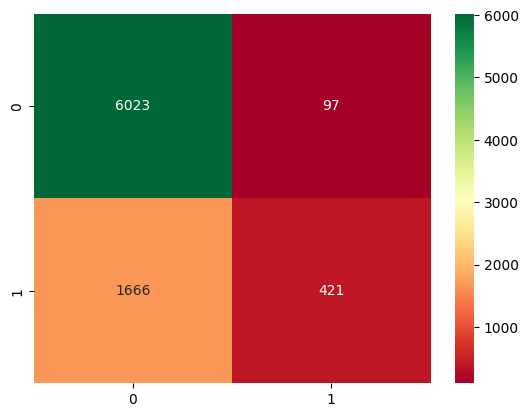

In [142]:
sns.heatmap(cm, annot=True, fmt='d',cmap='RdYlGn')

# **Gaussian NB**

In [143]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
G_model.fit(xtrain,ytrain)

GaussianNB()

In [144]:
ypred1=G_model.predict(xtest)

In [145]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6120
           1       0.66      0.47      0.55      2087

    accuracy                           0.80      8207
   macro avg       0.75      0.70      0.71      8207
weighted avg       0.79      0.80      0.79      8207



In [148]:
ypred1_train=G_model.predict(xtrain)
training_accuracy1 = accuracy_score(ytrain, ypred1_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7884603667824286


# **Checking for the over fitting and underfitting**

In [149]:
print("Training Accuracy:", training_accuracy1*100)
print("Testing_Accuracy=", (accuracy_score(ytest,ypred1)*100))

Training Accuracy: 81.15822823371718
Testing_Accuracy= 80.45570854148897


Both the test and train accuracy are approximately equal and hence the Gaussian NB-model in neither overfit nor underfit

# **Confusion Matrix**

In [146]:
cm1=confusion_matrix(ytest,ypred1)

In [147]:
cm1


array([[5617,  503],
       [1101,  986]])

<Axes: >

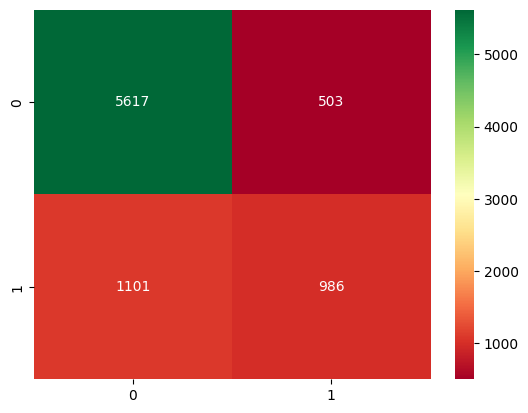

In [150]:
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn')

# **Calculating the accuracy of Multi NB model**

In [151]:
print("The accuracy_score of Gaussian NB is model=",accuracy_score(ytest,ypred1)*100)

The accuracy_score of Gaussian NB is model= 80.45570854148897
